# 단계
### 1단계
> - 노이즈 제거: 중복된 인스턴스를 찾아 제거하여 데이터의 일관성을 높입니다.
> - 보팅 분류기 예측: 여러 모델의 예측을 결합하여 노이즈 인스턴스를 예측합니다.

### 2단계
> - 이상치 제거: Isolation Forest를 사용하여 이상치를 제거하여 데이터의 품질을 개선합니다.
> - 정규화: 데이터의 스케일을 맞추어 모델 학습 시 균형 잡힌 학습이 이루어지도록 합니다.
> - 하이브리드 샘플링: SMOTETomek을 사용하여 클래스 불균형 문제를 해결합니다.

### 3단계
> - 차원 축소: PCA를 사용하여 차원을 축소하여 데이터의 복잡성을 줄이고 계산 효율성을 높입니다.



### 테스할 부분
> - 이상치 제거: Isolation Forest를 사용하여 이상치를 제거하여 데이터의 품질을 개선합니다.
> - 정규화: 데이터의 스케일을 맞추어 모델 학습 시 균형 잡힌 학습이 이루어지도록 합니다.
> - 하이브리드 샘플링: SMOTETomek을 사용하여 클래스 불균형 문제를 해결합니다.


#### 1.
> - 이상치 제거 -> 정규화 -> 하이브리드 샘플링

#### 2.
> - 이상치 제거 -> 하이브리드 샘플링 -> 정규화 => 성능이 더 안 좋아짐

In [1]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, precision_recall_curve, roc_curve, classification_report, roc_auc_score

def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred, pos_label=1)
    recall = recall_score(y_test, pred, pos_label=1)
    f1 = f1_score(y_test, pred, pos_label=1)

    # ROC-AUC 추가
    roc_auc = roc_auc_score(y_test, pred_proba)

    print('오차 행렬')
    print(confusion)

    # ROC-AUC print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
    F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

cust_df = pd.read_csv("../../data/santander-customer-satisfaction/train.csv", encoding='latin-1')
test_df = pd.read_csv("../../data/santander-customer-satisfaction/test.csv", encoding='latin-1')
santander_submission_df = pd.read_csv("../../data/santander-customer-satisfaction/sample_submission.csv", encoding='latin-1')

print(cust_df['TARGET'].value_counts())

total_cnt = cust_df.TARGET.count()
unsatisfied_cnt = cust_df[cust_df['TARGET'] == 1].TARGET.count()
print('unsatisfied 비율은 {0:.2f}'.format((unsatisfied_cnt / total_cnt * 100)))

print('santander customer satisfaction: 데이터 세트 Null 값 갯수 ',cust_df.isnull().sum().sum())

cust_df.drop('ID', axis=1, inplace=True) # 필요 없는 행 삭제

X = cust_df.iloc[:, :-1]
y = cust_df.iloc[:, -1]
cust_df

TARGET
0    73012
1     3008
Name: count, dtype: int64
unsatisfied 비율은 3.96
santander customer satisfaction: 데이터 세트 Null 값 갯수  0


,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76015,2,48,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60926.490000,0
76016,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,118634.520000,0
76017,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,74028.150000,0
76018,2,25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,84278.160000,0


In [3]:
nan_columns = X.columns[X.isna().any()].tolist()
len(nan_columns)

0

In [4]:
all_nan_columns = X.columns[X.isna().all()].tolist()
print(f"모든 값이 NaN인 컬럼 개수: {len(all_nan_columns)}")

X.drop(columns=all_nan_columns, inplace=True, axis=1)
test_df.drop(columns=all_nan_columns, inplace=True, axis=1)

모든 값이 NaN인 컬럼 개수: 0


In [5]:
unique_one_columns = [col for col in X.columns if X[col].nunique() == 1]
print(f'고유값이 1인 컬럼 개수: {len(unique_one_columns)}')

X.drop(columns=unique_one_columns, inplace=True, axis=1)
test_df.drop(columns=unique_one_columns, inplace=True, axis=1)

고유값이 1인 컬럼 개수: 34


In [6]:
duplicate_columns = []

columns = X.columns

for i in range(len(columns)):
    for j in range(i + 1, len(columns)):
        if X[columns[i]].equals(X[columns[j]]):
            duplicate_columns.append((columns[i], columns[j]))

print(len(duplicate_columns))
for col1, col2 in duplicate_columns:
    print(f"{col1} == {col2}")
    X.drop([col2], axis=1, inplace=True)
    test_df.drop([col2], axis=1, inplace=True)

29
ind_var6_0 == ind_var29_0
ind_var6 == ind_var29
ind_var13_medio_0 == ind_var13_medio
ind_var18_0 == ind_var18
ind_var26_0 == ind_var26
ind_var25_0 == ind_var25
ind_var32_0 == ind_var32
ind_var34_0 == ind_var34
ind_var37_0 == ind_var37
ind_var40 == ind_var39
num_var6_0 == num_var29_0
num_var6 == num_var29
num_var13_medio_0 == num_var13_medio
num_var18_0 == num_var18
num_var26_0 == num_var26
num_var25_0 == num_var25
num_var32_0 == num_var32
num_var34_0 == num_var34
num_var37_0 == num_var37
num_var40 == num_var39
saldo_var6 == saldo_var29
saldo_var13_medio == saldo_medio_var13_medio_ult1
delta_imp_reemb_var13_1y3 == delta_num_reemb_var13_1y3
delta_imp_reemb_var17_1y3 == delta_num_reemb_var17_1y3
delta_imp_reemb_var33_1y3 == delta_num_reemb_var33_1y3
delta_imp_trasp_var17_in_1y3 == delta_num_trasp_var17_in_1y3
delta_imp_trasp_var17_out_1y3 == delta_num_trasp_var17_out_1y3
delta_imp_trasp_var33_in_1y3 == delta_num_trasp_var33_in_1y3
delta_imp_trasp_var33_out_1y3 == delta_num_trasp_var33_

In [7]:
X['count_0'] = (X == 0).sum(axis=1)
test_df['count_0'] = (test_df == 0).sum(axis=1)

In [8]:
train_with_target = pd.concat([X, y], axis=1)

duplicates = train_with_target.duplicated(keep=False)
duplicates_with_different_target = duplicates & (train_with_target.groupby(list(X.columns))['TARGET'].transform('nunique') > 1)

noise = train_with_target[duplicates_with_different_target]
cleaned_train = train_with_target[~duplicates_with_different_target]

X = cleaned_train.drop('TARGET', axis=1)
y = cleaned_train['TARGET']

In [9]:
X['var3'].replace(-999999, -1, inplace=True)
test_df['var3'].replace(-999999, -1, inplace=True)

X.loc[np.isclose(X['var38'], 117310.979016), 'var38'] = -1
test_df.loc[np.isclose(test_df['var38'], 117310.979016), 'var38'] = -1

print(X['var38'].value_counts(), '\n')
print(test_df['var38'].value_counts())

var38
-1.00         12434
 451931.22       16
 463625.16       12
 288997.44       11
 104563.80       11
              ...  
 161472.81        1
 89665.50         1
 45876.57         1
 151505.64        1
 84278.16         1
Name: count, Length: 57735, dtype: int64 

var38
-1.00         14805
 451931.22       16
 128318.52       12
 288997.44       10
 97639.56         8
              ...  
 93565.38         1
 102840.90        1
 171909.27        1
 106548.93        1
 167299.77        1
Name: count, Length: 57570, dtype: int64


# 이상치 제거 -> 정규화 -> 하이브리드 샘플링

In [10]:
from sklearn.ensemble import IsolationForest
import plotly.express as px 

# 비지도학습 기반의 이상 탐지 알고리즘
clf = IsolationForest(
    n_estimators=50, 
    max_samples=50, 
    contamination=float(0.004), 
    max_features=1.0, 
    bootstrap=False, 
    n_jobs=-1, 
    verbose=0)


# 모델 학습
clf.fit(X)
pred = clf.predict(X)


# 예측 결과를 데이터프레임에 추가
X['label'] = pred
# X['scores'] = clf.decision_function(X)
# X['anomaly'] = X['label'].apply(lambda x: 'outlier' if x==-1  else 'inlier') 


# 이상치 데이터 추출 / 1=정상, -1=이상치
outliers = X.loc[X['label'] == -1]
outlier_index = list(outliers.index)


# 이상치와 정상치 개수 출력
print(X['label'].value_counts()) 


# 이상치를 제외한 데이터 추출
X = X.loc[X['label'] != -1]
X = X.drop(columns=['label'])  # 'label' 열 제거


# y에서도 이상치 인덱스 제거
y = y.drop(outlier_index)

test_df.drop('ID', axis=1, inplace=True)

label
 1    73290
-1      295
Name: count, dtype: int64


In [11]:
columns = X.columns
X

,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,count_0
0,2,23,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.17,292
1,2,34,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.03,266
2,2,23,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.77,277
3,2,37,0.0,195.00,195.00,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.97,248
4,2,39,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.00,256
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76014,2,39,0.0,375.99,405.33,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,90214.17,237
76015,2,48,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60926.49,292
76016,2,39,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,118634.52,261
76017,2,23,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,74028.15,278


In [12]:
sc = StandardScaler()
X = sc.fit_transform(X)
print('피처 데이터 shape:{0}'.format(X.shape))

test_df = sc.transform(test_df)
print('피처 데이터 shape:{0}'.format(test_df.shape))

피처 데이터 shape:(73290, 307)
피처 데이터 shape:(75818, 307)


In [13]:
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split, KFold

X_resampled, y_resampled = RandomUnderSampler(random_state=42, sampling_strategy=0.3).fit_resample(X, y)
X_train, X_val, y_train, y_val = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [14]:
s

NameError: name 's' is not defined

In [ ]:
import optuna
from lightgbm import LGBMClassifier

def objective(trial):
    param = {
        'objective': 'binary',
        'metric': 'binary_logloss',
        'boosting_type': 'gbdt',
        'num_leaves': trial.suggest_int('num_leaves', 20, 60),
        'min_child_samples': trial.suggest_int('min_child_samples', 5, 100),
        'min_child_weight': trial.suggest_float('min_child_weight', 0.1, 10.0),
        'max_depth': trial.suggest_int('max_depth', 2, 10),
        'subsample': trial.suggest_float('subsample', 0.5, 0.8),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 0.8),
        'learning_rate': trial.suggest_float('learning_rate', 0.001, 0.05, log=True),
        'scale_pos_weight': trial.suggest_float('scale_pos_weight', 1.0, 50.0),
        'reg_alpha': trial.suggest_float('reg_alpha', 1.0, 20.0),
        'reg_lambda': trial.suggest_float('reg_lambda', 1.0, 20.0),
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000)
    }

    lgb_model = LGBMClassifier(**param, random_state=42, verbose=-1)
    lgb_model.fit(X_train, y_train)
    y_val_pred = lgb_model.predict(X_val)
    f1 = f1_score(y_val, y_val_pred) 
    return f1

# Optuna를 사용한 하이퍼파라미터 튜닝
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

# 최적의 하이퍼파라미터 출력
best_params = study.best_params
print("Best params: ", best_params)

# 최적의 하이퍼파라미터로 모델 학습 및 평가
best_lgb_model = LGBMClassifier(**best_params, random_state=42)
best_lgb_model.fit(X_train, y_train)

# 검증 데이터에 대한 예측
y_val_pred = best_lgb_model.predict(X_val)

# 성능 평가
print(f"Accuracy: {accuracy_score(y_val, y_val_pred)}")
print(f"F1 Score: {f1_score(y_val, y_val_pred, pos_label=1)}")
print(f"Precision: {precision_score(y_val, y_val_pred, pos_label=1)}")  
print(f"Recall: {recall_score(y_val, y_val_pred, pos_label=1)}")

## best param

In [ ]:
{'num_leaves': 46, 'min_child_samples': 12, 'min_child_weight': 2.820021681085386, 'max_depth': 6, 'subsample': 0.5148962778452505, 'colsample_bytree': 0.6394266883886663, 'learning_rate': 0.006527582750011308, 'scale_pos_weight': 2.2543292093807263, 'reg_alpha': 8.276029671696778, 'reg_lambda': 8.170514833597844, 'n_estimators': 815}

In [15]:
best_param = {'num_leaves': 44, 'min_child_samples': 30, 'min_child_weight': 7.026190601165056, 'max_depth': 3, 'subsample': 0.6587318096159958, 'colsample_bytree': 0.6087483644642271, 'learning_rate': 0.01961668163863785, 'scale_pos_weight': 2.762646582387838, 'reg_alpha': 2.1002708478959153, 'reg_lambda': 18.205433395806338, 'n_estimators': 586}

**************!!#@@#!!*************
              precision    recall  f1-score   support

           0       0.90      0.78      0.84      1826
           1       0.50      0.72      0.59       546

    accuracy                           0.77      2372
   macro avg       0.70      0.75      0.71      2372
weighted avg       0.81      0.77      0.78      2372

[[1427  399]
 [ 154  392]]
0.717948717948718
0.49557522123893805
0.5863874345549738


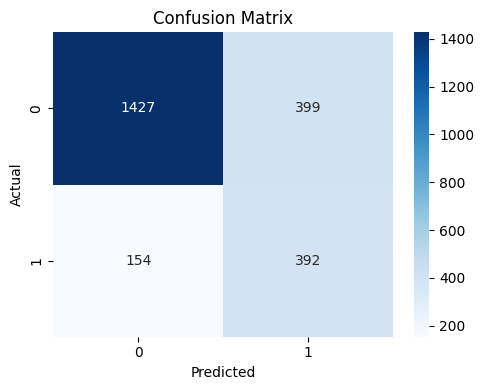

Train Data Evaluation:
오차 행렬
[[5891 1406]
 [ 540 1651]]
정확도: 0.7949, 정밀도: 0.5401, 재현율: 0.7535,    F1: 0.6292, AUC:0.8588

Validation Data Evaluation:
오차 행렬
[[1427  399]
 [ 154  392]]
정확도: 0.7669, 정밀도: 0.4956, 재현율: 0.7179,    F1: 0.5864, AUC:0.8307


In [16]:
from lightgbm import LGBMClassifier
import seaborn as sns

lgb_model = LGBMClassifier(**best_param, random_state=42, verbose=-1)

lgb_model.fit(X_train,y_train)
prd = lgb_model.predict(X_val)
f1 = f1_score(y_val, prd,pos_label=1)

print("**************!!#@@#!!*************")
print(classification_report(y_val,prd))
print(confusion_matrix(y_val,prd))
print(recall_score(y_val,prd,pos_label=1))
print(precision_score(y_val,prd,pos_label=1))
print(f1)
class_names = [0,1]
cm = confusion_matrix(y_val,prd)

def plot_confusion_matrix(cm, class_names):
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_names, yticklabels=class_names)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.tight_layout()
    plt.show()

plot_confusion_matrix(cm, class_names)


# 훈련 데이터에 대한 예측
y_train_pred = lgb_model.predict(X_train)
y_train_pred_proba = lgb_model.predict_proba(X_train)[:, 1]

# 검증 데이터에 대한 예측
y_test_pred = lgb_model.predict(X_val)
y_test_pred_proba = lgb_model.predict_proba(X_val)[:, 1]

# 예측 결과 평가
print("Train Data Evaluation:")
get_clf_eval(y_train, y_train_pred, y_train_pred_proba)

print("\nValidation Data Evaluation:")
get_clf_eval(y_val, y_test_pred, y_test_pred_proba)

In [ ]:
predict_santander_pred_is_rf = lgb_model.predict(test_df)
santander_submission_df['TARGET'] = predict_santander_pred_is_rf
santander_submission_df.to_csv('santander_submission_best.csv', index=False)
santander_submission_df

In [ ]:
# 훈련 데이터에 대한 예측
y_train_pred = best_lgb_model.predict(X_train)
y_train_pred_proba = best_lgb_model.predict_proba(X_train)[:, 1]

# 검증 데이터에 대한 예측
y_test_pred = best_lgb_model.predict(X_val)
y_test_pred_proba = best_lgb_model.predict_proba(X_val)[:, 1]

# 예측 결과 평가
print("Train Data Evaluation:")
get_clf_eval(y_train, y_train_pred, y_train_pred_proba)

print("\nValidation Data Evaluation:")
get_clf_eval(y_val, y_test_pred, y_test_pred_proba)

In [ ]:
predict_santander_pred_is_rf = best_lgb_model.predict(test_df)
santander_submission_df['TARGET'] = predict_santander_pred_is_rf
santander_submission_df.to_csv('santander_submission.csv', index=False)
santander_submission_df

# hard coding

In [17]:
test_df = pd.DataFrame(test_df, columns=columns)

In [18]:
predict_santander_pred_xgb = lgb_model.predict(test_df)
test_df['TARGET'] = predict_santander_pred_xgb
test_df['TARGET'].value_counts()

TARGET
0    58820
1    16998
Name: count, dtype: int64

In [19]:
test_y = test_df['TARGET']
test_X = test_df.drop(['TARGET'], axis=1)

In [20]:
test_df_original = sc.inverse_transform(test_X)
test_df_original = pd.DataFrame(test_df_original, columns=columns)
test_df_original['TARGET'] = test_y.values
test_df_original.loc[test_df_original['var15'] < 23, 'TARGET'] = 0

In [21]:
santander_submission_df['TARGET'] = test_df['TARGET']

# 결과를 CSV 파일로 저장
santander_submission_df.to_csv('santander_submission.csv', index=False)
santander_submission_df

,ID,TARGET
0,2,1
1,5,1
2,6,0
3,7,0
4,9,0
...,...,...
75813,151831,0
75814,151832,0
75815,151833,0
75816,151834,1


In [22]:
santander_submission_df['TARGET'].value_counts()

TARGET
0    58820
1    16998
Name: count, dtype: int64

In [ ]:
from catboost import CatBoostClassifier
import optuna

def objective(trial):
    param = {
        'loss_function': 'Logloss',  # binary_logloss에 해당하는 CatBoost 설정
        'eval_metric': 'F1',         # F1 점수로 평가
        'iterations': trial.suggest_int('iterations', 100, 1000),
        'depth': trial.suggest_int('depth', 4, 10),  # max_depth에 해당
        'learning_rate': trial.suggest_float('learning_rate', 0.001, 0.05, log=True),
        'l2_leaf_reg': trial.suggest_float('l2_leaf_reg', 1.0, 10.0),
        'random_strength': trial.suggest_float('random_strength', 0.5, 2.0),
        'border_count': trial.suggest_int('border_count', 32, 255),  # colsample_bytree에 해당하는 역할
        'bagging_temperature': trial.suggest_float('bagging_temperature', 0.0, 1.0),
        'scale_pos_weight': trial.suggest_float('scale_pos_weight', 1.0, 50.0)
    }

    # CatBoostClassifier 초기화 및 학습
    cat_model = CatBoostClassifier(**param, random_state=42, verbose=0)
    cat_model.fit(X_train, y_train, eval_set=(X_val, y_val), use_best_model=True, early_stopping_rounds=50)

    # 검증 데이터에 대한 예측
    y_val_pred = cat_model.predict(X_val)
    
    # F1 Score를 기준으로 최적화를 수행
    f1 = f1_score(y_val, y_val_pred)
    return f1

# Optuna를 사용한 하이퍼파라미터 튜닝
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

# 최적의 하이퍼파라미터 출력
best_params = study.best_params
print("Best params: ", best_params)

# 최적의 하이퍼파라미터로 모델 학습 및 평가
best_cat_model = CatBoostClassifier(**best_params, random_state=42, verbose=0)
best_cat_model.fit(X_train, y_train)

# 검증 데이터에 대한 예측
y_val_pred = best_cat_model.predict(X_val)

# 성능 평가
print(classification_report(y_val, y_val_pred))
print(f"Accuracy: {accuracy_score(y_val, y_val_pred)}")
print(f"F1 Score: {f1_score(y_val, y_val_pred)}")
print(f"Precision: {precision_score(y_val, y_val_pred)}")
print(f"Recall: {recall_score(y_val, y_val_pred)}")

In [ ]:
# 훈련 데이터에 대한 예측
y_train_pred = best_cat_model.predict(X_train)
y_train_pred_proba = best_cat_model.predict_proba(X_train)[:, 1]

# 검증 데이터에 대한 예측
y_test_pred = best_cat_model.predict(X_val)
y_test_pred_proba = best_cat_model.predict_proba(X_val)[:, 1]

# 예측 결과 평가
print("Train Data Evaluation:")
get_clf_eval(y_train, y_train_pred, y_train_pred_proba)

print("\nValidation Data Evaluation:")
get_clf_eval(y_val, y_test_pred, y_test_pred_proba)

In [ ]:
test_df = pd.DataFrame(test_df, columns=columns)

In [ ]:
predict_santander_pred_xgb = best_cat_model.predict(test_df)
test_df['TARGET'] = predict_santander_pred_xgb
test_df['TARGET'].value_counts()

In [ ]:
test_y = test_df['TARGET']
test_X = test_df.drop(['TARGET'], axis=1)

In [ ]:
test_df_original = sc.inverse_transform(test_X)
test_df_original = pd.DataFrame(test_df_original, columns=columns)
test_df_original['TARGET'] = test_y.values
test_df_original.loc[test_df_original['var15'] < 23, 'TARGET'] = 0

In [ ]:
santander_submission_df['TARGET'] = test_df['TARGET']

# 결과를 CSV 파일로 저장
santander_submission_df.to_csv('santander_submission.csv', index=False)
santander_submission_df

In [ ]:
santander_submission_df['TARGET'].value_counts()

# 학습

# Entropy-based Fuzzy Support Vector Machine = EFSVM
> - SVM 알고리즘의 확장으로, 데이터의 불확실성과 모호성을 처리하기 위해 퍼지 논리(fuzzy logic)와 엔트로피 개념을 결합한 기법
> - 노이즈가 많거나 불균형한 데이터셋에서 성능을 향상시키기 위해 설계

## 퍼지논리 
> - 퍼지 집합의 개념은 각 대상이 어떤 모임에 속한다 또는 속하지 않는다는 이진법 논리로부터 벗어나, 각 대상이 그 모임에 속하는 정도를 소속함수(membership function)로 나타내고 그 소속함수를 대응되는 대상과 함께 표기하는 집합
> - 흑과 백 사이의 무한한 회색의 농도인 아날로그를 의미

> - 이진 논리의 확장으로, 각 데이터 포인트가 특정 클래스에 속할 확률을 나타내는 퍼지 멤버십 값을 할당하며, 이는 데이터의 불확실성을 모델링하는 데 유용

## 엔트로피
> - 데이터의 불확실성을 측정하는 지표
> - 엔트로피 기반 접근법은 데이터 포인트의 정보량을 평가하여 중요한 특징을 선택하고 노이즈를 줄이는 데 도움
> - 엔트로피가 작을수록 정보가 더 확실
> - 트로피를 활용하면 학습 샘플의 클래스 확실성을 평가하고, 그 확실성에 따라 퍼지 멤버십을 계산할 수 있다.
> - 클래스 확실성이 높은 샘플은 큰 퍼지 멤버십을 가지고, 그렇지 않은 샘플은 작은 퍼지 멤버십을 가진다.

### 단계
> - 퍼지 멤버십 값 계산
>   - 각 데이터 포인트에 대해 퍼지 멤버십 값을 계산 -> 이 값은 데이터 포인트가 특정 클래스에 속할 확률을 나타낸다.
> - 엔트로피 계산
>   - 각 데이터 포인트의 엔트로피 값을 계산하여 데이터의 불확실성을 평가
> - 퍼지 SVM 학습
>   - 퍼지 멤버십 값과 엔트로피 정보를 통합하여 SVM 모델을 학습 -> 노이즈 데이터와 불균형 데이터를 더 잘 처리할 수 있도록 한다.
> - 분류
>   - 학습된 EFSVM 모델을 사용하여 새로운 데이터 포인트를 분류합니다.

In [ ]:
# EF-SVM
from scipy.stats import entropy
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import classification_report


def calculate_fuzzy_membership(X, y, k=5, beta=0.1):
    # k-최근접 이웃 계산
    nbrs = NearestNeighbors(n_neighbors=k, algorithm='auto').fit(X)
    _, indices = nbrs.kneighbors(X)
    # kneighbors 메서드는 각 데이터 포인트에 대해 k개의 가장 가까운 이웃의 인덱스를 반환
    
    fuzzy_membership = np.zeros(len(y))
    
    for i, neighbors in enumerate(indices):
        pos_count = np.sum(y[neighbors] == 0)
        neg_count = np.sum(y[neighbors] == 1)

        # 각 데이터 포인트의 k-최근접 이웃 중 양성 클래스와 음성 클래스의 비율을 계산
        # 데이터 포인트가 특정 클래스에 속할 확률
        p_pos = pos_count / k
        p_neg = neg_count / k
        
        # 엔트로피 계산
        # np.log(p_pos + 1e-10): 자연 로그 함수 (로그 함수를 적용할 때 0으로 나누는 것을 방지하기 위해 1e-10을 더한다.)
        # 엔트로피 값이 작을수록 클래스 확실성이 높음을 의미
        # 엔트로피 값이 클수록 클래스 확실성이 낮음을 의미
        entropy = -p_pos * np.log(p_pos + 1e-10) - p_neg * np.log(p_neg + 1e-10)
        
        # 퍼지 멤버십 계산
        # 퍼지 멤버십은 각 데이터 포인트가 특정 클래스에 속할 확실성을 나타내며, 엔트로피 값을 사용하여 계산
        # 엔트로피 값이 작을수록 퍼지 멤버십 값이 커집니다.
        # 엔트로피 값이 클수록 퍼지 멤버십 값이 작아집니다.
        # 0에서 1 사이의 값으로, 값이 클수록 데이터 포인트의 클래스 확실성이 높다.
        fuzzy_membership[i] = 1 - beta * entropy
    
    return fuzzy_membership


# 퍼지 멤버십 계산
fuzzy_membership = calculate_fuzzy_membership(X, y_3, k=5, beta=0.1)

# Fuzzy SVM 모델 훈련 및 예측
class FuzzySVM(SVC):
    def fit(self, X, y, sample_weight=None):
        super().fit(X, y, sample_weight=sample_weight)

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y_3, test_size=0.2, random_state=42)

# 퍼지 멤버십 값을 가중치로 사용
sample_weight = fuzzy_membership[:len(X_train)]

# Fuzzy SVM 모델 훈련 및 예측
fuzzy_svm_model = FuzzySVM()
fuzzy_svm_model.fit(X_train, y_train, sample_weight=sample_weight)
y_pred = fuzzy_svm_model.predict(X_test)

# 결과 출력
print(classification_report(y_test, y_pred))

In [ ]:
accuracy_tr = fuzzy_svm_model.score(X_train, y_train)
accuracy_te = fuzzy_svm_model.score(X_test, y_test)

print(f"SVM 정확도: {accuracy_tr * 100:.2f}%")
print(f"SVM 정확도: {accuracy_te * 100:.2f}%")

In [ ]:
predict_santander_pred_ef_efsvm = fuzzy_svm_model.predict(predict_df)
santander_submission_df['TARGET'] = predict_santander_pred_ef_efsvm
santander_submission_df.to_csv('santander_submission_efsvm.csv', index=False)
santander_submission_df

In [ ]:
s

# ANN

In [ ]:
# import tensorflow as tf
# from tensorflow.keras import backend as K

# def f1_score(y_true, y_pred):
#     y_true = K.cast(y_true, 'float32')
#     y_pred = K.round(y_pred)
#     y_pred = K.cast(y_pred, 'float32')
#     tp = K.sum(y_true * y_pred)
#     fp = K.sum((1 - y_true) * y_pred)
#     fn = K.sum(y_true * (1 - y_pred))

#     p = tp / (tp + fp + K.epsilon())
#     r = tp / (tp + fn + K.epsilon())

#     f1 = 2 * p * r / (p + r + K.epsilon())
#     return f1


# def find_best_threshold(y_test, pred_proba):
#     precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba)
#     f1_scores = [f1_score(y_test, (pred_proba >= t).astype(int)) for t in thresholds]
#     best_threshold = thresholds[np.argmax(f1_scores)]
#     best_f1_score = np.max(f1_scores)
#     return best_threshold, best_f1_score


# # 드롭아웃(Dropout)을 여러 층에 추가하는 것은 과적합을 방지하기 위한 좋은 방법
# # BatchNormalization은 배치 정규화로, 각 층의 입력을 정규화하여 학습을 안정화하고 빠르게 만드는 역할 / 과적합을 방지
# def model_fn(a_layer=None):
#     model = keras.Sequential()
#     model.add(keras.layers.Flatten(input_shape=(307, )))

#     model.add(keras.layers.Dense(100, activation='relu'))
#     model.add(keras.layers.BatchNormalization())
#     # model.add(keras.layers.Dropout(0.3))
    
#     model.add(keras.layers.Dense(100, activation='relu'))
#     model.add(keras.layers.BatchNormalization())
#     # model.add(keras.layers.Dropout(0.3))
    
#     if a_layer: #케라스 층을 추가하면 은닉층 뒤에 은닉층 추가
#         model.add(a_layer)

#     model.add(keras.layers.Dense(1, activation='sigmoid'))
#     return model

In [ ]:
# from tensorflow import keras

# model = model_fn(keras.layers.Dropout(0.3))
# model.summary()

# model.compile(optimizer='adam', loss='binary_crossentropy', metrics=[f1_score])

# checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.keras', save_best_only=True)
# early_stopping_cb = keras.callbacks.EarlyStopping(patience=20, restore_best_weights=True)

# history = model.fit(X_train, y_train, epochs=50, verbose=1, validation_data=(X_val, y_val), callbacks=[checkpoint_cb, early_stopping_cb])

# print(history.history.keys())
# print(early_stopping_cb.stopped_epoch)

In [ ]:
# model.evaluate(X_val, y_val)
# model.evaluate(X_train, y_train)

In [ ]:
# predict_santander_pred_svc = model.predict(test_df)
# predict_santander_pred_svc_binary = (predict_santander_pred_svc > 0.5).astype(int)

# predict_santander_pred_svc_df = pd.DataFrame(predict_santander_pred_svc_binary, columns=['TARGET'])

# santander_submission_df['TARGET'] = predict_santander_pred_svc_df['TARGET']
# santander_submission_df.to_csv('santander_submission_ann.csv',index=False)
# santander_submission_df

# Neural Network, Gradient Boosting and K-Nearest Neighbor

In [ ]:
# from tensorflow import keras
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, Dropout


# def create_nn_model(input_dim):
#     model = Sequential()
#     model.add(Dense(128, input_dim=input_dim, activation='relu'))
#     model.add(Dropout(0.5))
#     model.add(Dense(64, activation='relu'))
#     model.add(Dropout(0.5))
#     model.add(Dense(1, activation='sigmoid'))
#     return model


# nn_model = create_nn_model(X_train.shape[1])
# nn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


# checkpoint_cb = keras.callbacks.ModelCheckpoint('best_nn_model.keras', save_best_only=True)
# early_stopping_cb = keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)


# history = nn_model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test), callbacks=[checkpoint_cb, early_stopping_cb])

In [ ]:
# from sklearn.ensemble import GradientBoostingClassifier

# # Gradient Boosting 모델 정의 및 학습
# gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
# gb_model.fit(X_train, y_train)

In [ ]:
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.ensemble import VotingClassifier

# knn_model = KNeighborsClassifier(n_neighbors=5)
# combined_model = VotingClassifier(estimators=[('gb', gb_model), ('knn', knn_model)], voting='soft')
# combined_model.fit(X_train, y_train)

In [ ]:
# from sklearn.metrics import accuracy_score, f1_score

# nn_predictions = (nn_model.predict(X_test) > 0.5).astype("int32").flatten()
# gb_predictions = gb_model.predict(X_test)
# combined_predictions = combined_model.predict(X_test)


# # 각 모델의 예측 결과를 가중 평균하여 최종 예측을 도출
# # 신경망 모델과 앙상블 모델은 각각 25%의 가중치를, Gradient Boosting 모델은 50%의 가중치
# # 가중 평균
# weighted_predictions = (0.25 * nn_predictions + 0.5 * gb_predictions + 0.25 * combined_predictions).round().astype(int)


# accuracy = accuracy_score(y_test, weighted_predictions)
# f1 = f1_score(y_test, weighted_predictions)

# print(f'Ensemble Model Accuracy: {accuracy}')
# print(f'Ensemble Model F1 Score: {f1}')


In [ ]:
# nn_predictions = (nn_model.predict(predict_df) > 0.5).astype("int32").flatten()
# gb_predictions = gb_model.predict(predict_df)
# combined_predictions = combined_model.predict(predict_df)

# # 가중 평균
# weighted_predictions = (0.25 * nn_predictions + 0.5 * gb_predictions + 0.25 * combined_predictions).round().astype(int)

In [ ]:
# santander_submission_df['TARGET'] = weighted_predictions
# santander_submission_df.to_csv('santander_submission_kaggle.csv', index=False)
# santander_submission_df